# Purpose of this Notebook

The purpose of this notebook is to construct a simple 2D nonstationary kernel, using the method of Krause & Guestrin (2007), and then attempt to replicate it using Hexagonal-SSPs.

They implement a non-stationary kernel by using multiple stationary kernels, $k_{j}(\mathbf{x},\mathbf{x'})$, which are specified to be used over different regions, $j$, of the domain, $\mathbf{x} \in \mathbb{R}^{d}$.  Membership in the domain is determined by a function $w_{j}(\mathbf{x})$ and the nonstationary kernel is assembled:

$$
k(\mathbf{x},\mathbf{x'}) = \sum_{j=1}^{N}\lambda_{j}(\mathbf{x})\lambda_{j}(\mathbf{x'})k_{j}(\mathbf{x},\mathbf{x'})
$$

Where $\lambda_{j}(\mathbf{x}) = \sqrt{\frac{w_{j}(\mathbf{x})}{\sum_{k}w_{k}(\mathbf{x})}}$

[Easom function](https://www.sfu.ca/~ssurjano/easom.html) (for later)


$s'(x) = \sum_{j} \lambda_{j}(x) s(x)$

$s'(x)\cdot s'(x') = \left(\sum_{j}\lambda_{j}(x)s(x)\right)\cdot\left(\sum_{j'}\lambda_{j'}(x')s(x')\right)$

$= \sum_j \sum_j' \lambda_j(x) \lambda_j'(x') S_j(x) \cdot S_j'(x')$

$ \sum_j \ \lambda_j(x) \lambda_j(x') S_j(x) \cdot S_j(x')$

$$
k(\mathbf{x},\mathbf{x'}) = \sum_{j=1}^{N}\lambda_{j}(\mathbf{x})\lambda_{j}(\mathbf{x'})k_{j}(\mathbf{x},\mathbf{x'})
$$
$$
k(\mathbf{x},\mathbf{x'}) \approx \sum_{j=1}^{N}\lambda_{j}(\mathbf{x})\lambda_{j}(\mathbf{x'})(S_{j}(\mathbf{x})\cdot S_{j}(\mathbf{x'})
$$
$$
k(\mathbf{x},\mathbf{x'}) \approx \sum_{j=1}^{N}\lambda_{j}(\mathbf{x})S_{j}(\mathbf{x})\cdot \lambda_{j}(\mathbf{x'})S_{j}(\mathbf{x'})
$$
$$
k(\mathbf{x},\mathbf{x'}) \approx \sum_{j=1}^{N}\lambda_{j}(\mathbf{x})Circ_{j}S(\mathbf{x})\cdot \lambda_{j}(\mathbf{x'})Circ_{j}S(\mathbf{x'})
$$

$$
k(\mathbf{x},\mathbf{x'}) \approx \lambda_{0}(\mathbf{x})Circ_{0}S(\mathbf{x})\cdot \lambda_{0}(\mathbf{x'})Circ_{0}S(\mathbf{x'}) + \lambda_{1}(\mathbf{x})Circ_{1}S(\mathbf{x})\cdot \lambda_{1}(\mathbf{x'})Circ_{1}S(\mathbf{x'})
$$

$$ 
Circ(\mathcal{F}^{-1}\left\{ \lambda_{0}(x)m_{0} + \lambda_{1}(x)m_{1}\right\})
$$
$$ 
Circ(\mathcal{F}^{-1}\left\{ \lambda_{0}(x)m_{0}\right\} + \mathcal{F}^{-1}\left\{\lambda_{1}(x)m_{1}\right\})
$$
$$ 
Circ(\mathcal{F}^{-1}\left\{ \lambda_{0}(x)m_{0}\right\}) + Circ(\mathcal{F}^{-1}\left\{\lambda_{1}(x)m_{1}\right\})
$$
$$ 
\lambda_{0}(x)Circ(\mathcal{F}^{-1}\left\{m_{0}\right\}) + \lambda_{1}(x)Circ(\mathcal{F}^{-1}\left\{m_{1}\right\})
$$

$$
(C_{0}S(x) + C_{1}S(x))\cdot (C_{0}S(x) + C_{1}S(x))
$$
$$
[C_{0}S(x)\cdot C_{0}S(x) + C_{1}S(x)\cdot C_{1}S(x)] + [C_{1}S(x)\cdot C_{0}S(x) + C_{0}S(x)\cdot C_{1}S(x)]
$$


$m_{0} \in \{0,1\}^{d}$

$s'(x) = \mathcal{F}^{-1}\{m_{0}\odot e^{i\Theta x}\} = Circ(\mathcal{F}^{-1}\{m_{0}\}) S(x)$

$$
C_{0}S(x^{*})\cdot S(x) + C_{1}S(x^{*})\cdot S(x)
$$

$$
S(x^{*})^{T}C_{0}^{T}S(x) + S(x^{*})^{T}C_{1}^{T}S(x)
$$

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

Define two regions over 2D space. 

- First region: $[\frac{\pi}{2},\frac{3\pi}{2}] \times [\frac{\pi}{2},\frac{3\pi}{2}]$, which should have a short length scale
- Second region: $[-20,20] \times [-20, 20] - [\frac{\pi}{2},\frac{3\pi}{2}] \times [\frac{\pi}{2},\frac{3\pi}{2}]$, which should have a long lengthscale.

In [2]:
def membership(x):
    
    ws1 = np.array([1, 1e-2])
    lamb1 = np.sqrt(ws1 / np.sum(ws1))
    
    ws2 = np.array([1e-2, 1])
    lamb2 = np.sqrt(ws2 / np.sum(ws2))
    
    retval = np.tile(lamb2, (x.shape[0], 1))
    
    in_idxs = np.logical_and((x >= np.pi / 2).all(axis=1), (x <= 3 * np.pi / 2).all(axis=1))
    retval[in_idxs,:] = lamb1
    
    return retval
### end membership
def kernel_func(x,x_p,l=1):
    return np.exp(-0.5 * np.linalg.norm(x-x_p, axis=1)**2 / l) / (l * np.sqrt(2 * np.pi))

def kernels(x,x_p):
    #k1 = np.prod(np.sinc((x - x_p) / 0.1), axis=1)
    #k2 = np.prod(np.sinc((x - x_p) / 4), axis=1)
    k1 = kernel_func(x, x_p, l=0.1)
    k2 = kernel_func(x, x_p, l=10)
    return np.vstack((k1, k2)).T

In [3]:
xs = np.linspace(-20,20,100)
ys = np.copy(xs)

X,Y = np.meshgrid(xs,ys)
points = np.vstack((X.flatten(), Y.flatten())).T
print(points.shape)

(10000, 2)


<IPython.core.display.Javascript object>


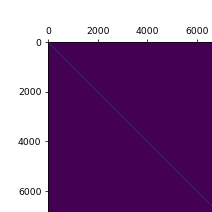

In [4]:
similarities = np.zeros((points.shape[0], points.shape[0]))
memberships = membership(points)
for i in range(points.shape[0]):
    kern_vals = kernels(np.atleast_2d(points[i,:]), points)
    v = np.einsum('nj,nj->n',memberships, kern_vals)
    similarities[i,:] = v
### end for
plt.matshow(similarities)

<IPython.core.display.Javascript object>


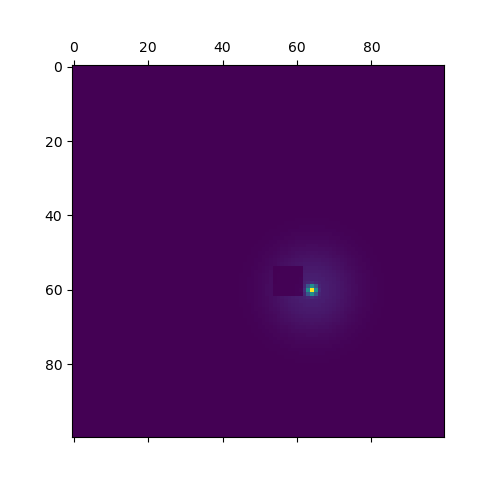

In [5]:
plt.matshow(similarities[6064,:].reshape((len(xs), len(ys))))

<IPython.core.display.Javascript object>


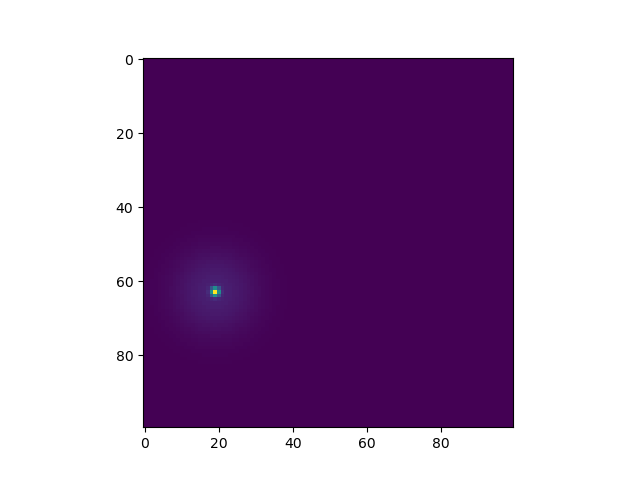

In [44]:
import matplotlib.cm as cm
import matplotlib.animation as animation

frames = [] # for storing the generated images
fig = plt.figure()
for i in range(5000, 8000):
    frames.append([plt.imshow(similarities[i,:].reshape((len(xs), len(ys))),animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=10, blit=True,
                                repeat_delay=1000)
# ani.save('movie.mp4')
plt.show()

# SSP Implementation

Now we want to compute the same thing with SSPs, using Hex SSPs.  Initial plan: use the same membership function to turn off the high frequency components before computing similarity.

In [5]:
from scipy.linalg import circulant

def make_mask(memberships, ssp_dim, break_idx):
    mask = np.ones((ssp_dim,2))
    offset = (ssp_dim - break_idx) // 2
    ## This is backwards compared to what I would have expected.
    # For region 1 turn off the high frequency components.
    mask[-offset:, 0] = 0
    mask[:offset, 0] = 0
    # For region 2 turn off the low-frequench components
    mask[offset:-offset, 1] = 0
    
    circ_mats = np.zeros((mask.shape[1], ssp_dim, ssp_dim))
    
    mask_mats = np.zeros((memberships.shape[0], ssp_dim, ssp_dim))
    for i in range(memberships.shape[0]):
        # In the frequency domain, weight the different sub-components by the membership score.
        # We are squaring the membership to make them proper probabilities, but this may cause
        # Problems down the line.
        freq_mask = mask[:,0] * memberships[i,0]**2 + mask[:,1] * memberships[i,1]**2
        time_mask = np.fft.irfft(freq_mask, n=mask.shape[0])
        mask_mats[i,:,:] = circulant(time_mask)
    # end for
    
    return mask_mats

def mask_similarities(memberships, ssps, break_idx=3):
    mask_mats = make_mask(memberships, ssps.shape[1], break_idx)
    masked_ssps = np.einsum('ned,nd->ne', mask_mats, ssps)
    return masked_ssps
    

In [6]:
from ssp_bayes_opt import sspspace

ssp_space = sspspace.HexagonalSSPSpace(domain_dim=2, 
                                       #ssp_dim=151, 
                                       n_rotates=5,
                                       n_scales=5,
                                       scale_min=0.1,
                                       scale_max=10,
                                       domain_bounds=np.array([[-20,20], [-20,20]]), 
                                       length_scale=1)
ssp_xs = ssp_space.encode(points)


In [7]:
masked_ssps = mask_similarities(memberships, ssp_xs, break_idx=20)
print(masked_ssps.shape)
ssp_sims = np.zeros((masked_ssps.shape[0], masked_ssps.shape[0]))
for i in range(masked_ssps.shape[0]):
    ssp_sims[i,:] = np.einsum('d,nd->n', masked_ssps[i,:], masked_ssps)

(10000, 151)


<IPython.core.display.Javascript object>


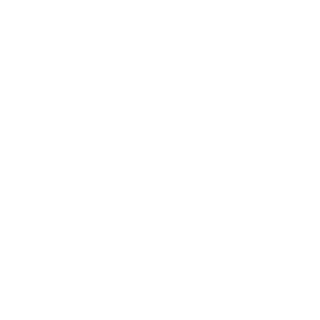

In [8]:
s_idx = 6000
best_idx = np.argmax(ssp_sims[s_idx,:].reshape((len(xs), len(ys))))
plt.matshow(ssp_sims[s_idx,:].reshape((len(xs), len(ys))))

coord = np.unravel_index(best_idx, (len(xs), len(ys)))
plt.scatter(coord[1],coord[0], marker='x',c='red')
s_coord = np.unravel_index(s_idx, (len(xs), len(ys)))
plt.scatter(s_coord[1],s_coord[0], marker='+',c='red')



<IPython.core.display.Javascript object>


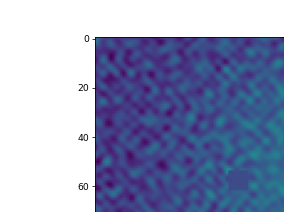

In [10]:
from matplotlib import animation

ssp_frames = [] # for storing the generated images
fig = plt.figure()
for i in range(5400, 6400):
    ssp_frames.append([plt.imshow(ssp_sims[i,:].reshape((len(xs), len(ys))),animated=True)])

ani = animation.ArtistAnimation(fig, ssp_frames, interval=10, blit=True,
                                repeat_delay=1000)
#ani.save('ssp-similarity.mp4')
plt.show()

In [11]:
ssp_space.n_rotates

AttributeError: 'HexagonalSSPSpace' object has no attribute 'n_rotates'

In [38]:


def make_mask2(memberships, ssp_dim, break_idx,  n_scales, n_rotates):
    assert break_idx < n_scales
    scale_mask = np.ones((n_scales,2))
    scale_mask[:break_idx,0] = 0
    scale_mask[break_idx:,1] = 0
    
    mask_half = np.tile(np.repeat(scale_mask,3,axis=0),(n_rotates,1))
    mask = np.vstack([[1,1],mask_half, np.flip(mask_half,axis=0)])
   
    circ_mats = np.zeros((mask.shape[1], ssp_dim, ssp_dim))
    
    mask_mats = np.zeros((memberships.shape[0], ssp_dim, ssp_dim))
    for i in range(memberships.shape[0]):
        # In the frequency domain, weight the different sub-components by the membership score.
        # We are squaring the membership to make them proper probabilities, but this may cause
        # Problems down the line.
        freq_mask = mask[:,0] * memberships[i,0]**2 + mask[:,1] * memberships[i,1]**2
        time_mask = np.fft.irfft(freq_mask, n=mask.shape[0])
        mask_mats[i,:,:] = circulant(time_mask)
    # end for
    
    return mask_mats

def mask_similarities2(memberships, ssps,break_idx, n_scales, n_rotates):
    mask_mats = make_mask2(memberships, ssps.shape[1], break_idx, n_scales, n_rotates)
    masked_ssps = np.einsum('ned,nd->ne', mask_mats, ssps)
    return masked_ssps
    

In [39]:
n_scales = 10
n_rotates = 4
ssp_space = sspspace.HexagonalSSPSpace(domain_dim=2, 
                                       #ssp_dim=151, 
                                       n_rotates=n_rotates,
                                       n_scales=n_scales,
                                       scale_min=0.1,
                                       scale_max=10,
                                       domain_bounds=np.array([[-20,20], [-20,20]]), 
                                       length_scale=1)
ssp_xs = ssp_space.encode(points)


masked_ssps = mask_similarities2(memberships, ssp_xs,5, n_scales, n_rotates)
print(masked_ssps.shape)
ssp_sims = np.zeros((masked_ssps.shape[0], masked_ssps.shape[0]))
for i in range(masked_ssps.shape[0]):
    ssp_sims[i,:] = np.einsum('d,nd->n', masked_ssps[i,:], masked_ssps)

(10000, 241)


<IPython.core.display.Javascript object>


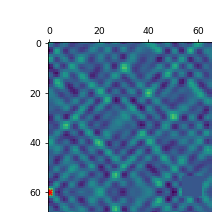

In [40]:
s_idx = 6000
best_idx = np.argmax(ssp_sims[s_idx,:].reshape((len(xs), len(ys))))
plt.matshow(ssp_sims[s_idx,:].reshape((len(xs), len(ys))))

coord = np.unravel_index(best_idx, (len(xs), len(ys)))
plt.scatter(coord[1],coord[0], marker='x',c='red')
s_coord = np.unravel_index(s_idx, (len(xs), len(ys)))
plt.scatter(s_coord[1],s_coord[0], marker='+',c='red')


In [42]:
from matplotlib import animation

ssp_frames = [] # for storing the generated images
fig = plt.figure()
for i in range(5400, 6400):
    ssp_frames.append([plt.imshow(ssp_sims[i,:].reshape((len(xs), len(ys))),animated=True)])

ani = animation.ArtistAnimation(fig, ssp_frames, interval=10, blit=True,
                                repeat_delay=1000)
#ani.save('ssp-similarity.mp4')
plt.show()

<IPython.core.display.Javascript object>